# Diffusion

:::{admonition} **What you will learn**

- Microscopic model of diffusion and its link to ranom walk
- Mean square displacement as measure of diffusive motion
- Mesoscopic model of diffuion and how to simulate Brownian motion
- Macroscopic model of diffusion and Fick's law

:::


:::{figure-md} markdown-fig  

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4d/DiffusionMicroMacro.gif" alt="DiffusionMicroMacro.gif" style="width:10%">

Diffusion at Micro, Meso and Macro scales.

:::  


### Microscopic Aspects of Diffusion: Random Walk

- Microscopic theories of diffusion are built on **random walk models**, which lead to the derivation of the **diffusion equation**.
- We begin by considering an **unbiased random walk** with $ n $ steps, all originating from $ r_0 = 0 $.
- Repeating this process $N$ times allows us to compute **ensemble-averaged** quantities. For instance, the average single-step displacement,  confirms that the random walk is unbiased.

  $$
  \langle r_i \rangle = 0,
  $$

- The total displacement after $ n $ steps is given by:

  $$
  R_n = \sum^{n}_{i=0} r_i
  $$

- Taking the ensemble average:

  $$
  \langle R_n \rangle = \sum^{n}_{i=0} \langle r_i \rangle = 0.
  $$

- A more insightful measure is the **mean square displacement (MSD)**, which quantifies fluctuations of the random walker relative to the origin as a function of time.


In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML



def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = 0.5
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        line.set_data_3d(walk[:num, :].T)
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the Axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.close()
HTML(ani.to_jshtml())

#### Mean Square Displacement and Diffusion Coefficient

- Expressing the number of steps in terms of time increments $ n = \frac{t}{\delta t} $, we compute the **ensemble average** over $ N $ random walkers:

$$
\langle R^2_n\rangle = \sum^{n}_{i=1} \sum^{n}_{j=1} \langle r_i r_j \rangle = \sum_i \langle r^2_i \rangle
$$

- Where **the cross terms vanished** becasue of independence of random variables $\langle r_i r_j \rangle = \langle r_i \rangle \langle r_j \rangle=0$.
- Since all dimensions are equal we can write for e.g, 3D random walker $\langle r^2\rangle= 3\langle x^2\rangle$ or more generally for $d$ dimensions

$$
\langle R^2_n\rangle = \sum^{n}_{i=1} d \cdot \langle \delta x^2_i \rangle = d \cdot n \cdot  \langle \delta x^2 \rangle
$$

$$
\langle R^2_n\rangle = d \cdot \frac{t}{\delta t}  \cdot \langle \delta x^2 \rangle
$$

Grouping constants together, we define the **diffusion coefficient** $D$, which characterizes the spreading of a particle:

$$
D = \frac{\langle \delta x^2 \rangle}{2\delta t}
$$


:::{admonition} **Mean Square Displacement (MSD)**
:class: important

$$
\langle R^2 (t) \rangle = 2d D t
$$

- Rimension $d=1, 2, 3 ...$
- Time $t$
- Displacement from the origin $R$

:::

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.zeros(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk

def mean_square_displacement(walks):
    """Compute MSD over all walks."""
    squared_displacements = [np.sum(walk**2, axis=1) for walk in walks]
    return np.mean(squared_displacements, axis=0)

# Parameters
num_steps = 100
num_walks = 40
walks = [random_walk(num_steps) for _ in range(num_walks)]

# Compute MSD
msd = mean_square_displacement(walks)

time = np.arange(num_steps)
plt.plot(time, msd, label="MSD")
plt.xlabel("Time step")
plt.ylabel("Mean Square Displacement")
plt.title("MSD in 3D Random Walk")
plt.legend()
plt.show()

**Diffusive Motion**

- Any motion for which MSD follows  **linear scaling with time** is called **diffusive**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

d=3 
t= np.linspace(0, 1, 10000)

for D in [0.01, 0.1, 1, 10]:
    
    plt.plot(t, 2*d *D * t, label=f'D={D}')
    #plt.loglog(t, 2*d *D * t**0.5)

plt.legend()
plt.ylabel('$MSD(t)$')
plt.xlabel('$t$')

:::{admonition} **Pause to reflect: from random walk to diffusion equation**
:class: note, dropdown 

- Think what probability distribution would random walk model fo diffusion predict.
- How can we derive an equation of motion that governs $p(x, t)$.
- Take a molecule with equal jump probabilities 1/2. How to relate probability of molecule being at $x$, at and advanced  time $t+\delta t$  to probabilities of being in nearby locations $x\pm \Delta x$ at previous step t. 
- Ttry forming derivative with respect to time by taking difference $p(x, t+\delta t)-p(x,t)$ that can lead us to equation of motion
:::


### Chapman-Kolmogorov Relation  

- **Key idea of time evolving probabilities:** The total probability of going from $y_1$ to $y_3$ is obtained by considering every possible intermediate state $y_2$ and adding up the probabilities of taking those two consecutive transitions

:::{figure-md} markdown-fig  

<img src="./figs/CK-visual.png" style="width:50%">

Graphical representation of the Chapman–Kolmogorov equa- tion which relates the transition probability $P(y_3, t_3 |y_1, t_1 )$ to go from the start position $y_1$ at $t_1$ to the end position $y_3$ at $t_3$ to the transition probabilities to go from the start position to any position at t2 and then from there to the end position.
:::  

- The Chapman-Kolmogorov (CK) relation is simply a formal restatement of basic probability rules (product rule and sum rule), tailored for stochastic processes evolving in time. 


:::{admonition} **Chapman-Kolmogorov relation**
:class: important


$$
P(y_3, t_3 | y_1, t_1) = \int P(y_3, t_3 | y_2, t_2 ) P(y_2, t_2 | y_1, t_1 ) \, dy_2
$$

- $P(y_2, t_2 | y_1, t_1 )$: Probability of transitioning from an **initial stat** to **intermediate state.**
- $P(y_2, t_2 | y_1, t_1 )$: Probability of transitioning from an **intermediate state** to **final state.** 
- $P(y_3, t_3 | y_1, t_1 )$: Probability of transitioning from an **initial state**  to **final state.**  
:::

- A situation of great interest to us is to start with some initial molecular distirbution described by uncoditional probabulity distribution $P(x',t)$ and connect it to final distribution $p(x, t+\delta t)$. This can be done via transition probability $p(x, t+\delta t, x', t)$

$$
P(x, t+\delta t) = \int P(x, t+\delta t | x', t ) \cdot P(x', t ) \, dx'
$$

:::{admonition} **Delta Functions: A Primer for statistical mechanics**  
:class: tip, dropdown

**1. Definition and Intuition** 

- The delta function is **zero everywhere except at $x = 0$** and **integrates to one**:  

$$
\delta(x) = 0 \quad \text{for } x \neq 0, \quad \text{and} \quad \int_{-\infty}^{\infty} \delta(x) \, dx = 1.
$$

- It can be viewed as the limit of a **narrow Gaussian**:  

$$
\delta(x) = \lim_{\sigma \to 0} \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{x^2}{2\sigma^2}}.
$$


**2. Sifting (Sampling) Property**  

- The most important property for statistical mechanics is the **sifting property**, which extracts the value of a function at a point:  

$$
\int_{-\infty}^{\infty} f(x) \delta(x - x_0) \, dx = f(x_0).
$$

- This is useful for representing probability distributions where all probability is concentrated at a single state or energy level.  


**3. Delta Function in Fourier Space**

- In statistical mechanics, the delta function appears frequently in **Fourier transforms**, which are used to compute **correlation functions** and analyze **spectral densities**. 

- The **Fourier representation** of the delta function is:  

$$
\delta(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{ikx} \, dk.
$$


**Delta Functions Represent Discrete Outcomes**  

- In probability theory, the delta function is a natural tool to represent **discrete probabilities in continuous space**, because it indicates a **probability mass at a single point**.  

- For instnace If a particle can only be at position $x_0$ at time $t$  with probability 1, the probability distribution is:

$$
P(x, t) = \delta(x - x_0).
$$

 **Transition Probabilities for Discrete Stochastic Processes**  

- In discrete stochastic processes, the **transition probability** describes the likelihood of moving from one state to another in a single step. Since the possible outcomes are discrete, the transition probability at each possible outcome is best represented by a **sum of delta functions**, each weighted by its probability.  

- For a process with possible next states $x_i$ and probabilities $p_i$, the transition probability is:

$$
P(x, t+\delta t | x_0, t) = \sum_i p_i \delta(x - x_i).
$$

- This expression compactly encodes that the probability of landing at one of the possible states is **zero everywhere except those states**.  E.g for a next roll of die all $p_i=1/6$ and $x_i=1-6$

 **Random Walk and the Sum of Two Delta Functions**  

- In a **1D simple symmetric random walk**, a walker moves either **one step to the left** or **one step to the right** with **equal probability $ \frac{1}{2} $**. At each time step, there are exactly two possible outcomes from position $ x_0 $:  

- With probability $ \frac{1}{2} $, move to $ x_0 + \delta x $.  
- With probability $ \frac{1}{2} $, move to $ x_0 - \delta x $.  

$$
P(x, t + \delta t | x_0, t) = \frac{1}{2} \delta(x - x_0 - \delta x) + \frac{1}{2} \delta(x - x_0 + \delta x).
$$

:::

:::{admonition} **Derivation of the Diffusion Equation from a Random Walks**  
:class: tip, dropdown

- To derive the **diffusion equation** from a **random walk**, we consider a discrete-time process where a particle moves in steps of size $ \delta x $ at each time increment $ \delta t $. 


$$
P(x, t + \delta t | x', t) = \frac{1}{2} \delta(x - x' - \delta x) + \frac{1}{2} \delta(x - x' + \delta x).
$$

- The transition probability in continum space is a sum of two delta funcions becasue Random walker at any time-point is faced with making binary choice. Hence the probability to be at a location $x$ given location $x'$ looks like two narrow bars placed at $x-x' = \pm \delta x$. 

- Plugging this transition pribability into Chapman_Kolmogorov relation we get a **recurrence relation** relating probabilities at future times to probabilities at past times. 

$$
P(x, t + \delta t) = \int_{-\infty}^{\infty} P(x, t + \delta t | x', t) P(x', t) \, dx'.
$$

$$
P(x, t+\delta t) = \frac{1}{2} P(x - \delta x, t ) + \frac{1}{2} P(x + \delta x, t).
$$

- Expanding previois location probabilities $ P(x\pm \delta x, t) $ using a **Taylor series** in small $ \delta x $

$$
P(x \pm \delta x, t ) \approx P(x, t ) \pm \delta x \frac{\partial P}{\partial x} + \frac{(\delta x)^2}{2} \frac{\partial^2 P}{\partial x^2}.
$$

- Substituting into the recurrence relation and cancelling first derivative terms with oposite signs we arrive at

$$
P(x, t+\delta t) = P(x, t) + \frac{(\delta x)^2}{2} \frac{\partial^2 P}{\partial x^2}.
$$

- Rearranging to form time derivative:

$$
\frac{P(x, t+\delta t) - P(x, t)}{\delta t} = \frac{(\delta x)^2}{2 \delta t} \frac{\partial^2 P}{\partial x^2}.
$$

- Taking the limit $ \delta t \to 0 $ and defining the **diffusion coefficient** $ D = \frac{(\delta x)^2}{2 \delta t} $, we obtain the **diffusion equation**:

$$
\frac{\partial P(x,t)}{\partial t} = D \frac{\partial^2 P(x,t)}{\partial x^2}.
$$

:::


:::{admonition} **Generating Functions and the Emergence of the Gaussian Distribution**  
:class: tip, dropdown

- Here we consider a **generalization of a random walk with variable steps** where steps $X_i$ are themleves random variables described by a probability $P(x)dx$ of finding random walker at position x. 
- After N steps we want to know probability that sum of the steps is equal to some displacement $R$.

$$R = X_1 +X_2+... X_N $$

To formally derive the **Gaussian nature** of the probability distribution for the random walk, we start with the **definition of the probability distribution** of the sum of independent steps:

$$
P_n(R) = \int dx_1 dx_2 \dots dx_n \, P(x_1) P(x_2) \dots P(x_n) \, \delta\left(R - \sum_{i=1}^{n} x_i \right)
$$

Here, $ P(x) $ represents the probability density function (PDF) for a single step. The presence of the **Dirac delta function** enforces the sum constraint.

We introduce the **Fourier representation** of the delta function:

$$
\delta(R - \sum_i x_i) = \int \frac{dk}{2\pi} e^{-ik(R - \sum_i x_i)}
$$

Substituting into $ P_n(R) $, we obtain:

$$
P_n(R) = \int \frac{dk}{2\pi} e^{-ikR} \left[ \int dx \, P(x) e^{ikx} \right]^n
$$

The term in brackets is the **Generating function** (Fourier transform of the step distribution):

$$
G(k) = \int dx \, P(x) e^{ikx}
$$

Since each step is independent, the generating function of the sum factorizes:

$$
P_n(R) = \int \frac{dk}{2\pi} e^{-ikR} \left[G(k)\right]^n
$$

For small steps, we expand $ G(k) $ in a Taylor series:

$$
G(k) = 1 - \frac{1}{2} k^2 \langle x^2 \rangle + \mathcal{O}(k^4)
$$

Thus, for large $ n $, we approximate:

$$
\left[G(k)\right]^n \approx e^{ -\frac{1}{2} n k^2 \langle x^2 \rangle }
$$

Taking the inverse Fourier transform, we obtain the **Gaussian probability density function (PDF)**:

$$
P_n(R) = \frac{1}{\sqrt{2\pi n \langle x^2 \rangle}} e^{ -\frac{R^2}{2n \langle x^2 \rangle} }
$$

Since $ n = \frac{t}{\delta t} $, this gives the **diffusion propagator**:

$$
P(R, t) = \frac{1}{\sqrt{4\pi D t}} e^{-R^2 / (4Dt)}
$$

This result shows that the **probability of finding the particle at position $ R $ at time $ t $ follows a Gaussian distribution**, which is the solution to the **diffusion equation**:

$$
\frac{\partial P}{\partial t} = D \nabla^2 P
$$

Thus, diffusion emerges **naturally from the sum of many independent random steps**, justifying the **Gaussian approximation** via the central limit theorem.

:::

### Mesoscopic aspects of Diffusion


:::{figure-md} markdown-fig  

<img src="./figs/history_diff.png" alt="DiffusionMicroMacro.gif" style="width:50%">

Fick's laws of diffusion, first proposed by Adolf Fick in 1855, were based largely on experimental observations. These laws describe diffusion in a manner analogous to Fourier's heat equation (1822), which models heat transport. In 1827, Robert Brown observed the random motion of microscopic particles suspended in a fluid, later termed Brownian motion. Building on this, Albert Einstein developed a microscopic theory of diffusion in 1905, providing a theoretical foundation for Brownian motion. His work was instrumental in convincing scientists of the particulate nature of matter, a key step toward validating atomic theory.

:::  

- Ranom walk provides a microscopic model of self-diffusion of molecules. Here we consider coarser diffusion on a coarser or mesocopic scale where a hevier solute particle moves erratically as a result of collisions with lighter solvent molecules. This setup is called **Brownian motion** 
- Einstein's 1905 derivation of the diffusion equation provides a fundamental description of Brownian motion. This derivation bridges statistical mechanics and macroscopic diffusion laws.

:::{figure-md} markdown-fig  

<img src="figs/dp_diffusion.png" alt="Brownian Motion Animation" style="width:30%">  

Visual explanation of computing probability of solute being at position and time $(x, t+\Delta t)$ given that it started some $x-\Delta x$ position away where $\Delta x$ is variable and in fact gaussian distributed due to numerous collisions with solvent molecules which make such summed jump a gaussian random variable per CLT 

:::  

- Let $P(x,t)$ be the probability density of finding the solute particle at position $x$ at time $t$.

- Assuming that the probability of moving a small displacement $\Delta x$ in a small time interval $\Delta t$ is given by a conditional probability function $\Phi(\Delta x) = P(x, t+\Delta t | x - \Delta x, t)$, which represents the probability of making a jump $\Delta x$ given that the particle was at $x - \Delta x$. Using the law of conditional probabilities (CK relation), the probability of finding the particle at $x$ is given by:

$$ P(x,t+\Delta t) = \int_{-\infty}^{\infty} \Phi(\Delta x ) P(x-\Delta x, t) d(\Delta x)$$

- For small displacements, we expand $P(x-\Delta x, t)$ in a Taylor series:

$$ P(x-\Delta x, t) \approx P(x,t) - \Delta x \frac{\partial P}{\partial x} + \frac{(\Delta x)^2}{2} \frac{\partial^2 P}{\partial x^2}$$


- Expanding the integral equation to second order and assuming symmetry, i.e.,

$$ \int_{-\infty}^{\infty} \Phi(\Delta x) \Delta x d(\Delta x) = 0, $$

$$ \int_{-\infty}^{\infty} \Phi(\Delta x) (\Delta x)^2 d(\Delta x) = 2D \Delta t, $$

- where $D$ is the diffusion coefficient, we obtain:

$$ P(x,t+\Delta t) = P(x,t) + D\Delta t \frac{\partial^2 P}{\partial x^2}. $$

- Taking the limit $\Delta t \to 0$, we recover the **diffusion equation** which is a partial differential equation (PDE) that can be solved by specifying initial and boundary conditions. 

:::{admonition} **Diffution Equation as a PDE**
:class: important

$$ \frac{\partial P(x,t)}{\partial t} = D \frac{\partial^2 P(x,t)}{\partial x^2} $$

:::

- Probability at $x$ changes faster (time derivative) if there is a larger imabalance of probability around point x (second derivative of $x$). 


In [ ]:
# Parameters
num_walkers = 10000  # Number of random walkers
num_steps = 500  # Number of steps
delta_x = 1  # Step size
delta_t = 1  # Time step
D = (delta_x**2) / (2 * delta_t)  # Diffusion coefficient

# Initialize positions
positions = np.zeros(num_walkers)

# Store probability distribution at different time steps
time_snapshots = [10, 100, 500]
histories = {t: None for t in time_snapshots}

# Perform random walk
for step in range(num_steps):
    positions += np.random.choice([-delta_x, delta_x], size=num_walkers)  # Step left or right
    if step + 1 in time_snapshots:
        hist, bin_edges = np.histogram(positions, bins=np.arange(-50, 51, 1), density=True)
        histories[step + 1] = (bin_edges[:-1], hist)

# Compute analytical Gaussian solution
x = np.linspace(-50, 50, 200)
fig, ax = plt.subplots(figsize=(8, 5))

for t in time_snapshots:
    # Simulated random walk distribution
    ax.plot(histories[t][0], histories[t][1], 'o', label=f"Random Walk at t={t}", alpha=0.6)

    # Diffusion equation Gaussian solution
    sigma_t = np.sqrt(2 * D * t)
    gaussian_solution = (1 / np.sqrt(4 * np.pi * D * t)) * np.exp(-x**2 / (4 * D * t))
    ax.plot(x, gaussian_solution, '-', label=f"Diffusion Eq. at t={t}")

# Formatting the plot
ax.set_title("Random Walk vs. Diffusion Equation", fontsize=14)
ax.set_xlabel("Position (x)", fontsize=12)
ax.set_ylabel("Probability Density $\\rho(x,t)$", fontsize=12)
ax.legend()
ax.grid(alpha=0.3)
plt.show()


:::{admonition} **Compute second derivative numerically**
:class: note, dropdown 

- Write down the first and second derivatives of a function p(x) as limit of differences.  
- Take a 1D function $p(x)$ in numpy, plot then compute first and then second derivatives at different points
:::

#### Simulating Brownian Motion  

:::{figure-md} markdown-fig  

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Brownian_motion_large.gif" alt="Brownian Motion Animation" style="width:10%">  

Animation of Brownian Motion 

:::  

- **Brownian motion** describes the random movement of a particle suspended in a solvent composed of much smaller molecules. This motion arises from **a large number of independent random collisions** with solvent molecules. 
- We have worked out a mesoscopic theory of diffusion and obtained probability distribution as a function of time $P(x, t)$ for solute moolecules in dilute solution. 
- Here we switch perspective to random variables, and make use of CLT to approximate the displacement of the particle over a small time step $dt$ as a normally distributed random variable with variance $\sigma^2 = 2Dt$

$$
x(t+dt) - x(t) \sim \mathcal{N}(0, \sqrt{2D dt})
$$


- Using transformation $N(\mu, \sigma^2) = \mu + \sigma N(0,1)$ to normal random variable we arrive at simple recipie for simulating brownian motion.

:::{admonition} **Simulating Brownian Motion with Normal Random Variables**
:class: important

$$
x(t+dt) = x(t) + \sqrt{2D dt} \cdot N(0,1)
$$

- $dt$ simulation time step
- $D$ Diffusion coeficient
:::

- This formulation highlights the connection between Brownian motion and Gaussian distributions. Specifically, we rewrite the update step using the general form of a normally distributed random variable:

- In the future we will meet Langevin equation which is also a mesoscopic model, but it sits at a finer level of description compared to the standard Brownian motion model. In langevin description we will explicitly model the forces and momentum relaxation of brownian particle

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps = 1000  # Number of steps
num_walks = 5  # Number of random walks to visualize
step_size = 1  # Step size
dt = 1  # Time step

# 1D Brownian Motion
fig, ax1 = plt.subplots(figsize=(10, 5))

for _ in range(num_walks):
    x = np.cumsum(np.random.normal(loc=0, scale=np.sqrt(dt) * step_size, size=num_steps))  # 1D Random Walk
    ax1.plot(np.arange(num_steps), x, alpha=0.7)

ax1.set_title("1D Brownian Motion", fontsize=14)
ax1.set_xlabel("Time Step", fontsize=12)
ax1.set_ylabel("Position", fontsize=12)
ax1.grid(alpha=0.3)

# 2D Brownian Motion
fig, ax2 = plt.subplots(figsize=(6, 6))

for _ in range(num_walks):
    x = np.cumsum(np.random.normal(loc=0, scale=np.sqrt(dt) * step_size, size=num_steps))  # x displacement
    y = np.cumsum(np.random.normal(loc=0, scale=np.sqrt(dt) * step_size, size=num_steps))  # y displacement
    ax2.plot(x, y, alpha=0.7)

ax2.set_title("2D Brownian Motion", fontsize=14)
ax2.set_xlabel("X Position", fontsize=12)
ax2.set_ylabel("Y Position", fontsize=12)
ax2.grid(alpha=0.3)

# Show plots
plt.show()


### Macroscopic aspects of Diffusion

- Here we derive **Fick's law (diffusive transport) from continuity equation.**
- The continuity equation expresses the conservation of particle number in a system:

$$ \frac{\partial \rho}{\partial t} + \nabla \cdot \mathbf{J} = 0 $$

- $\rho(\mathbf{r}, t)$ is the local particle density,
- $\mathbf{J}(\mathbf{r}, t)$ is the particle flux.

- To establish Fick's law, we assume a diffusive system where the flux is proportional to the negative gradient of the density:

$$ \mathbf{J} = - D \nabla \rho $$

- where $D$ is the diffusion coefficient. Substituting this into the continuity equation gives:

$$ \frac{\partial \rho}{\partial t} = D \nabla^2 \rho $$

- This is the diffusion equation, which describes how density evolves over time due to diffusion. The assumption of a linear flux-density relation is justified in systems where particle motion is driven by concentration gradients and follows a random walk behavior.

:::{admonition} **Reflect on meaning of flux, first and second derivative**
:class: info, dropdown

- What does flux measure?
- What does derivative of flux measure?
- Plug gaussian function to verify that it is indeed a solution to diffusion equation
- Compute Flux using gaussian function

:::


:::{admonition} **Solution of the 1D Diffusion Equation via Generating Functions**  
:class: tip, dropdown

We aim to solve the **1D diffusion equation**:

$$
\frac{\partial \rho(x,t)}{\partial t} = D \frac{\partial^2 \rho(x,t)}{\partial x^2}
$$

using **generating functions**.



**Step 1: Defining the Generating Function**  
The **generating function** (or **Fourier transform**) of $ \rho(x,t) $ is:

$$
G(k,t) = \int_{-\infty}^{\infty} e^{ikx} \rho(x,t) dx
$$

Applying the Fourier transform to both sides of the diffusion equation:

$$
\frac{\partial}{\partial t} G(k,t) = D (-k^2) G(k,t)
$$

which simplifies to a simple **first-order differential equation**:

$$
\frac{\partial G(k,t)}{\partial t} = -D k^2 G(k,t)
$$



**Step 2: Solving the ODE for $ G(k,t) $**  
This equation has the **exponential solution**:

$$
G(k,t) = G(k,0) e^{-D k^2 t}
$$

For an initial **delta function** distribution $ \rho(x,0) = \delta(x) $, its Fourier transform is **unity**:

$$
G(k,0) = 1
$$

Thus, the **evolved generating function** is:

$$
G(k,t) = e^{-D k^2 t}
$$



**Step 3: Inverting the Fourier Transform**  
To find $ \rho(x,t) $, we take the **inverse Fourier transform**:

$$
\rho(x,t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{-D k^2 t} e^{-ikx} dk
$$

This integral is a well-known **Gaussian integral**, yielding:

$$
\rho(x,t) = \frac{1}{\sqrt{4\pi D t}} e^{-x^2 / (4Dt)}
$$

This is the **fundamental solution** of the 1D diffusion equation, showing that the initial **delta function** spreads into a **Gaussian distribution** with variance:

$$
\sigma^2 = 2Dt
$$

:::

#### **Numerical Solution to Diffusion Equations**

- Below, we numerically compute and plot the solutions of diffusion equations given initial and boundary conditions.

$$
\frac{\partial\rho ({\bf r}, t)}{\partial t} = D\nabla^2\rho({\bf r}, t)
$$

- **Initial condition:**

$$\rho(r, t=0) = \delta(r-r_0)$$

- **Boundary condition:**

$$\rho(r\rightarrow \infty, t) = 0$$


:::{admonition} **Solving the 1D Diffusion Equation via Finite Differences**
:class: tip, dropdown

The **1D diffusion equation** describes the evolution of a probability density (or concentration) $ \rho(x,t) $ over time due to diffusion:

$$
\frac{\partial \rho}{\partial t} = D \frac{\partial^2 \rho}{\partial x^2}
$$

where $ D $ is the **diffusion coefficient**.



**1. Discretization using Finite Differences**

To solve this equation numerically, we **discretize** both space and time:
- Divide space into **grid points** $ x_i $ with spacing $ \Delta x $.
- Evolve the solution over **time steps** $ t^n $ with interval $ \Delta t $.

Using **finite difference approximations**:

- **Time derivative (Forward Euler method):**

  $$
  \frac{\rho_i^{n+1} - \rho_i^n}{\Delta t} = D \frac{\partial^2 \rho}{\partial x^2}
  $$

- **Second spatial derivative (Central Difference method):**

  $$
  \frac{\partial^2 \rho}{\partial x^2} \approx \frac{\rho_{i+1}^n - 2\rho_i^n + \rho_{i-1}^n}{\Delta x^2}
  $$

Rearranging, the explicit update equation becomes:

$$
\rho_i^{n+1} = \rho_i^n + \alpha \left( \rho_{i+1}^n - 2\rho_i^n + \rho_{i-1}^n \right)
$$

where $ \alpha = \frac{D \Delta t}{\Delta x^2} $ is the stability parameter.



**2. Initial & Boundary Conditions**

- **Initial Condition:** The system starts with a localized distribution, typically a **Gaussian peak** or a **delta function approximation**.
  
  $$
  \rho(x, 0) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-x^2 / (2\sigma^2)}
  $$

- **Boundary Conditions:** Common choices include:
  - **Dirichlet (Fixed value):** $ \rho(x_{\text{min}},t) = \rho(x_{\text{max}},t) = 0 $ (absorbing boundaries).
  - **Neumann (No flux):** $ \frac{\partial \rho}{\partial x} \big|_{x_{\text{min}}} = \frac{\partial \rho}{\partial x} \big|_{x_{\text{max}}} = 0 $ (reflecting boundaries).
  - **Periodic:** $ \rho(x_{\text{min}},t) = \rho(x_{\text{max}},t) $ (for circular domains).

**3. Stability Condition**

The explicit method requires:

$$
\alpha = \frac{D \Delta t}{\Delta x^2} \leq \frac{1}{2}
$$

to **prevent numerical instability** (CFL condition).


**Algorithm Overview**

1. **Initialize** $ \rho(x, 0) $ based on the given initial condition.
2. **Loop over time**:
   - Compute the new values using the finite difference update formula.
   - Apply boundary conditions.
3. **Repeat** until the final time is reached.

This approach provides a simple yet effective way to simulate **diffusion processes** and compare numerical results with analytical solutions.

:::

/tmp/ipykernel_2929/1083195704.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  rho_numerical /= np.trapz(rho_numerical, x)  # Normalize


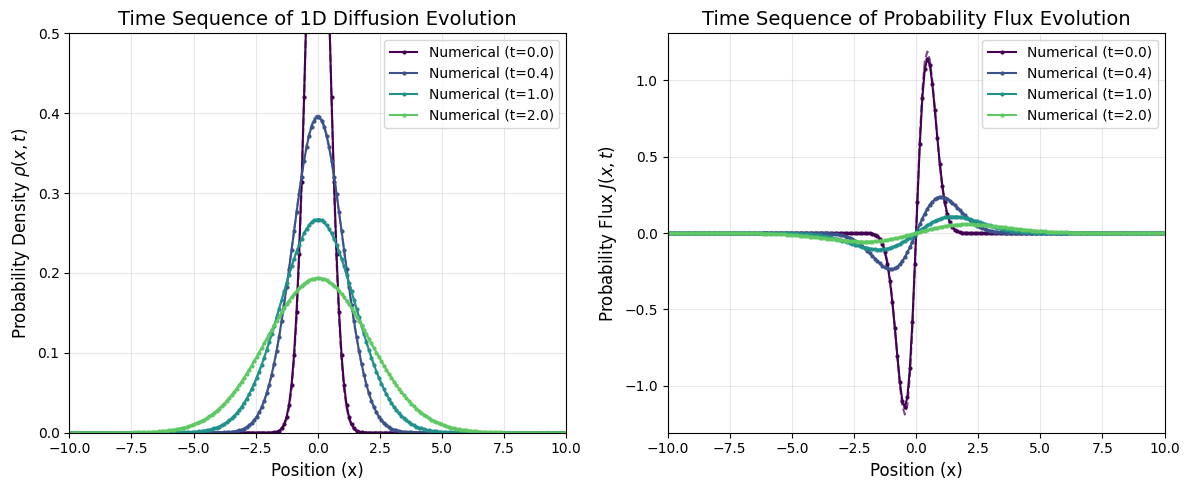

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Reinitialize all missing parameters
D = 1  # Diffusion coefficient
x_min, x_max = -10, 10  # Spatial range
num_points = 200  # Number of spatial points
dx = (x_max - x_min) / (num_points - 1)  # Spatial step

# Stability condition: Ensure alpha <= 0.5
dt = 0.4 * dx**2 / D  # Choose dt to satisfy stability

num_frames = 500  # Number of time steps
alpha = D * dt / dx**2  # Compute new alpha

# Discretized space
x = np.linspace(x_min, x_max, num_points)
sigma_t = lambda t: np.sqrt(2 * D * t)  # Standard deviation of the Gaussian

# Recompute missing variables
time_steps = [0, 100, 250, 500]  # Key time steps for snapshots
snapshots_numerical = []
snapshots_analytical = []

# Reinitialize numerical solution
rho_numerical = np.exp(-x**2 / (2 * sigma_t(0.1)**2)) / np.sqrt(2 * np.pi * sigma_t(0.1)**2)
rho_numerical /= np.trapz(rho_numerical, x)  # Normalize

for step in range(num_frames + 1):
    t = step * dt + 0.1  # Avoid division by zero at t=0

    # Analytical solution
    rho_analytical = (1 / np.sqrt(2 * np.pi * sigma_t(t)**2)) * np.exp(-x**2 / (2 * sigma_t(t)**2))

    # Numerical solution using finite difference explicit method
    rho_new = rho_numerical.copy()
    rho_new[1:-1] = rho_numerical[1:-1] + alpha * (rho_numerical[2:] - 2 * rho_numerical[1:-1] + rho_numerical[:-2])
    
    rho_numerical[:] = rho_new  # Update state

    # Store snapshots at selected time steps
    if step in time_steps:
        snapshots_numerical.append(rho_numerical.copy())
        snapshots_analytical.append(rho_analytical.copy())

# Create figure with two panels: one for probability density, one for flux
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Generate colors from a sequential colormap
cmap = cm.viridis  # Perceptually uniform colormap
colors = [cmap(i / len(time_steps)) for i in range(len(time_steps))]  # Sequential colors

# Plot probability density evolution
for i, step in enumerate(time_steps):
    axes[0].plot(x, snapshots_numerical[i], label=f"Numerical (t={step * dt:.1f})", linestyle="-", marker="o", markersize=2, color=colors[i])
    axes[0].plot(x, snapshots_analytical[i], linestyle="--", color=colors[i], alpha=0.7)  # Faded analytical curve

axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(0, 0.5)
axes[0].set_xlabel("Position (x)", fontsize=12)
axes[0].set_ylabel("Probability Density $\\rho(x,t)$", fontsize=12)
axes[0].set_title("Time Sequence of 1D Diffusion Evolution", fontsize=14)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Compute and plot flux evolution
for i, step in enumerate(time_steps):
    J_numerical = -D * np.gradient(snapshots_numerical[i], x)  # Numerical flux
    J_analytical = -D * np.gradient(snapshots_analytical[i], x)  # Analytical flux

    axes[1].plot(x, J_numerical, label=f"Numerical (t={step * dt:.1f})", linestyle="-", marker="o", markersize=2, color=colors[i])
    axes[1].plot(x, J_analytical, linestyle="--", color=colors[i], alpha=0.7)  # Faded analytical curve

axes[1].set_xlim(x_min, x_max)
axes[1].set_xlabel("Position (x)", fontsize=12)
axes[1].set_ylabel("Probability Flux $J(x,t)$", fontsize=12)
axes[1].set_title("Time Sequence of Probability Flux Evolution", fontsize=14)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


:::{admonition} **Numerical Solution of 2D diffusion equation using the finite difference method**
:class: dropdown, tip

- The probability density $\rho(x,y,t)$ is initialized as a **delta function** at the center.
- We use an **explicit finite difference scheme**, updating each grid point using the standard **5-point stencil**:

$$
  \rho_{i,j}^{t+dt} = \rho_{i,j}^t + D \frac{dt}{dx^2} \left( \rho_{i+1,j} + \rho_{i-1,j} + \rho_{i,j+1} + \rho_{i,j-1} - 4\rho_{i,j} \right)
$$

- The stability condition $dt < dx^2 / (4D)$ ensures numerical accuracy.

- The final heatmap visualization shows the **spread of the probability distribution** over time due to diffusion. Let me know if you need further enhancements!

:::

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 1  # Diffusion coefficient
L = 20  # Grid size (L x L)
dx = 1.0  # Grid spacing
dt = 0.1  # Time step

# Stability condition for explicit diffusion scheme: alpha = D * dt / dx^2 ≤ 0.25 (for 2D case)
assert D * dt / dx**2 <= 0.25, "Choose a smaller dt or larger dx for numerical stability."

num_steps = 500  # Total time steps for simulation
time_steps = [0, 100, 250, 500]  # Selected time steps for snapshots

# Initialize grid with an initial delta function at the center
rho = np.zeros((L, L))
rho[L//2, L//2] = 1.0 / (dx**2)  # Initial peak

# Prepare figure
fig, axes = plt.subplots(1, len(time_steps), figsize=(15, 5))

# Finite difference loop (explicit scheme) with snapshots
snapshots = {}
for step in range(num_steps + 1):
    rho_new = rho.copy()
    rho_new[1:-1, 1:-1] = rho[1:-1, 1:-1] + D * dt / dx**2 * (
        rho[:-2, 1:-1] + rho[2:, 1:-1] + rho[1:-1, :-2] + rho[1:-1, 2:] - 4 * rho[1:-1, 1:-1]
    )
    rho = rho_new

    if step in time_steps:
        snapshots[step] = rho.copy()

# Plot snapshots
for ax, step in zip(axes, time_steps):
    im = ax.imshow(snapshots[step], extent=[-L//2, L//2, -L//2, L//2], cmap="hot", origin="lower")
    ax.set_title(f"t = {step * dt:.1f}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

# Add colorbar
fig.colorbar(im, ax=axes.ravel().tolist(), label="Probability Density $\\rho(x, y, t)$")
plt.suptitle("Time Evolution of 2D Diffusion", fontsize=14)
plt.show()

### Micro, meso and macro-scales

#### Microscopic: Random Walk

- At the microscopic scale, diffusion is modeled as a stochastic process where particles undergo random displacements at discrete time steps. This is formalized using the **random walk** model, where the position of a particle evolves as:

$$ x_{n+1} = x_n + \xi_n $$

- where $\xi_n$ is a random step drawn from a probability distribution. E.g equal 1/2 proabilities to jump left or right. 

#### Mesoscopic: Einstein's Relation and Brownian Motion

- At the mesoscopic level, diffusion is described statistically via **Einstein's relation**, linking diffusion to thermal fluctuations:

$$ \langle x^2 \rangle = 2Dt $$

- where $D$ is the diffusion coefficient. Brownian motion is modeled as a normal random variable:

$$ x(t) \sim \mathcal{N}(0, 2Dt) $$

- which emerges from the central limit theorem applied to many small random steps.

#### Macroscopic: Fick's Law and Continuum Description

- At the macroscopic level, diffusion is governed by **Fick’s laws**, treating concentration as a continuous field:

$$ \frac{\partial \rho}{\partial t} = D \nabla^2 \rho $$

- This formulation assumes smooth variation of density and applies to large-scale systems where microscopic fluctuations average out.

#### Interpretation of $\Delta t$

- **Microscopic:** $\Delta t$ is the time step for each random jump.
- **Mesoscopic:** $\Delta t$ is the coarse-grained time over which many microscopic steps accumulate.
- **Macroscopic:** $\Delta t$ is a continuum variable where diffusion is treated as a smooth process.

Each scale offers a different but complementary perspective on diffusion, linking stochastic motion at the particle level to deterministic transport equations at the continuum scale.

### References

**The mighty little books**
-  ["Random Walks in Biology",  H Berg (1993)](https://www.amazon.com/Random-Walks-Biology-Howard-Berg/dp/0691000646)
-  ["Physical models of Living systems",  P Nelson (2015)](https://www.amazon.com/gp/product/1464140294/ref=ppx_yo_dt_b_search_asin_title?ie=UTF8&psc=1)

**More in depth**
 - ["Simple Brownian Diffusion: An Introduction to the Standard Theoretical Models", D Gillespie](https://www.amazon.com/Simple-Brownian-Diffusion-Introduction-Theoretical/dp/0199664501/ref=sr_1_1?keywords=diffusion+brownian&qid=1579882520&sr=8-1)
 - ["Stochastic Processes for Physicists" K Jacobs](https://www.amazon.com/Stochastic-Processes-Physicists-Understanding-Systems/dp/0521765420/ref=sr_1_1?keywords=kurt+jacobs+stochastic&qid=1579882738&sr=8-1)
 
**On the applied side**
- [Brownian Motion: Elements of Colloid Dynamics A P Philipse (2018)](https://www.amazon.com/Brownian-Motion-Elements-Dynamics-Undergraduate/dp/3319980521/ref=sr_1_7?keywords=einstein+brownian&qid=1579882356&sr=8-7)